# Problem 5: Universal Approximators: Depth Vs. Width

Computational Hardware details: 4 vCPUs, 15 GB RAM, NVIDIA Tesla P100 x 2 GPUs.

In [1]:
import numpy as np
from math import sin,sqrt
from sklearn.model_selection import train_test_split
import time

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import SGD as SGD
from keras import regularizers

import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
x = np.random.uniform(-512,512,(100000,2))
y = np.array([(-xi[0]-47)*sin(sqrt(abs(xi[0]/2+(xi[1]+47))))-xi[0]*sin(abs(xi[0]-xi[1]-47)) for xi in x] + np.random.normal(0,0.3,100000)).reshape(100000,1)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=10)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

#Normalize input
x_train /= 512
x_test /= 512

(80000, 2) (80000, 1) (20000, 2) (20000, 1)


In [4]:
SGD(nesterov=True)

In [5]:
#Single layer models
t_1 = []
metrics_1 = []

model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start
t_1.append(ttaken)
metrics_1.append(model.evaluate(x_test,y_test))
print("model 1 done")

model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start
t_1.append(ttaken)
metrics_1.append(model.evaluate(x_test,y_test))
print("model 1 done")

model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start
t_1.append(ttaken)
metrics_1.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start
t_1.append(ttaken)
metrics_1.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(512, input_dim=2, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start
t_1.append(ttaken)
metrics_1.append(model.evaluate(x_test,y_test))

training model

20000/20000 [==============================] - 1s 33us/step
model 1 done
training model
20000/20000 [==============================] - 1s 34us/step
model 1 done
training model
20000/20000 [==============================] - 1s 34us/step
training model
20000/20000 [==============================] - 1s 35us/step
training model
20000/20000 [==============================] - 1s 35us/step


In [7]:
print("Metrics for layer 1: ",metrics_1)
print("Time taken for layers 1: ",t_1)

Metrics for layer 1:  [88273.018634375, 88272.895859375, 88272.5790875, 88048.9421625, 88018.190434375]
Time taken for layers 1:  [370.7395372390747, 363.43489813804626, 363.1855764389038, 363.3981685638428, 366.1117813587189]


In [8]:
#Double Layer Models

t_2 = []
metrics_2 = []

model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu',kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear', use_bias=False))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size = 1000, verbose=0)
ttaken = time.time()-start
t_2.append(ttaken)
metrics_2.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu',kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear', use_bias=False))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size = 1000, verbose=0)
ttaken = time.time()-start
t_2.append(ttaken)
metrics_2.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu',kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear', use_bias=False))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size = 1000, verbose=0)
ttaken = time.time()-start
t_2.append(ttaken)
metrics_2.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu',kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear', use_bias=False))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size = 1000, verbose=0)
ttaken = time.time()-start
t_2.append(ttaken)
metrics_2.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu',kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear', use_bias=False))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size = 1000, verbose=0)
ttaken = time.time()-start
t_2.append(ttaken)
metrics_2.append(model.evaluate(x_test,y_test))

training model
20000/20000 [==============================] - 1s 52us/step
training model
20000/20000 [==============================] - 1s 57us/step
training model
20000/20000 [==============================] - 1s 56us/step
training model
20000/20000 [==============================] - 1s 59us/step
training model
20000/20000 [==============================] - 1s 59us/step


In [9]:
print("Metrics for layer 2: ",metrics_2)
print("Time taken for layers 2: ",t_2)

Metrics for layer 2:  [88287.0532375, 88274.058721875, 88288.43178125, 88276.85150625, 88275.260884375]
Time taken for layers 2:  [778.1950402259827, 758.079925775528, 773.7233598232269, 764.1095430850983, 781.5058348178864]


In [10]:
#Triple Layer Models
t_3 = []
metrics_3 = []

model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start
t_3.append(ttaken)
metrics_3.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start
t_3.append(ttaken)
metrics_3.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start

#Ignore the error below-due to a wrong variable name (t instead of t_3 in the next cell). It does not affect the source. Network takes too long to train it again (on an average, each model takes close to 30 minutes on 2 NVDIA P100s):D

training model
20000/20000 [==============================] - 1s 68us/step
training model
20000/20000 [==============================] - 1s 72us/step
training model


NameError: name 't' is not defined

In [11]:
t_3.append(ttaken)
metrics_3.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start
t_3.append(ttaken)
metrics_3.append(model.evaluate(x_test,y_test))

model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_initializer='zeros', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.compile(optimizer='SGD', loss='mean_squared_error')
print("training model")
start = time.time()
model.fit(x_train, y_train, epochs=2000, batch_size=1000, verbose=0)
ttaken = time.time()-start
t_3.append(ttaken)
metrics_3.append(model.evaluate(x_test,y_test))

20000/20000 [==============================] - 2s 77us/step
training model
20000/20000 [==============================] - 2s 76us/step
training model
20000/20000 [==============================] - 2s 83us/step


In [14]:
print("Metrics for layer 3: ",metrics_3)
print("Time taken for layers 3: ",t_3)

Metrics for layer 3:  [88272.1808375, 88272.254046875, 88272.182946875, 88272.196721875, 88272.183859375]
Time taken for layers 3:  [1003.4113006591797, 987.1585192680359, 1003.2690584659576, 1016.3088991641998, 1017.4656870365143]


In [15]:
nhu_1 = [32,64,128,256,512]
nhu_2 = [256,284,320,384,512]
nhu_3 = [320,352,384,416,512]

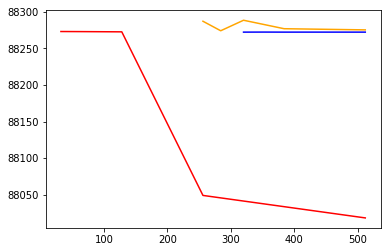

In [16]:
#Plot #Layers vs RMSE
plt.plot(nhu_1,metrics_1,color='red')
plt.plot(nhu_2,metrics_2,color='orange')
plt.plot(nhu_3,metrics_3,color='blue')
plt.show()

## RMSE vs No. of Layers:

We can see in the above graph that the RMSE is the least when we use a single, shallow layer of 512 hidden units over a deep, 3-layer network. This result is counterintuitive- although we expect deeper networks to learn more features and perform better, this looks like deep the deep network overfits the training data, and hence performs poorly on the test set. 
An interesting observation: The RMSE for a three layer network is more or less the same irrespective of the number of nodes used in each layer.

## RMSE vs number of hidden units

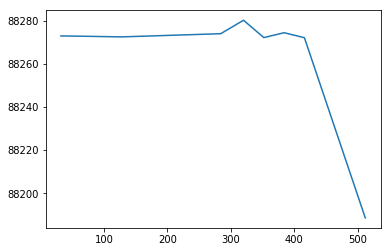

In [32]:
x_t = [32,64,128,284,320,352,384,416,512]
m_t = metrics_1[0:3] + [metrics_2[1]] + [(metrics_2[2]+metrics_3[0])/2] + [metrics_3[1]] + [(metrics_2[3]+metrics_3[2])/2] + [metrics_3[3]] + [(metrics_1[4]+metrics_2[4]+metrics_3[4])/3]
plt.plot(x_t,m_t)
plt.show()

## Numer of parameters vs Training Time:



[370.7395372390747, 363.43489813804626, 363.1855764389038]


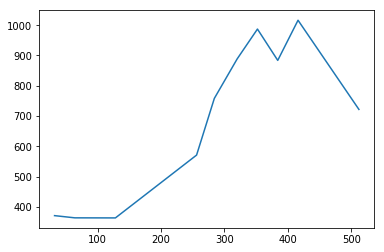

In [24]:
x_t = [32,64,128,256,284,320,352,384,416,512]
y_t = t_1[0:3] + [(t_1[3]+t_2[0])/2] + [t_2[1]] + [(t_2[2]+t_3[0])/2] + [t_3[1]] + [(t_2[3]+t_3[2])/2] + [t_3[3]] + [(t_1[4]+t_2[4]+t_3[4])/3]
plt.plot(x_t,y_t)

The above plt on No. of Training Units vs Time is NOT a true reflection of the behaviour as the number of layers in each step vary. 
Having said that, we can observe that within a lyer, as the number of neurons increases, the training time increases. Eg: the chart below for a single layer neural network:

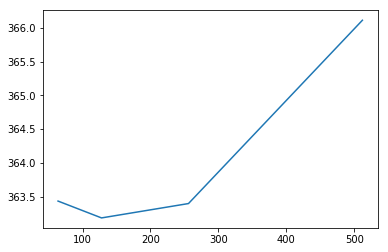

In [29]:
x_t1 = [64,128,256,512]
plt.plot(x_t1,t_1[1:])